The database required are to be placed in the Google drive and the drive is mounted. In this project we are using the acceleration values generated through different phones denoted as PID's and the Clean TAC values which helps in analyzing if the person is sober or intoxicated.

In [1]:
#to mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Current working directory is set
%cd /content/drive/MyDrive/ProjectFinal/

/content/drive/MyDrive/ProjectFinal


In [3]:
import pandas as pd
import numpy as np

The data base that has the pids and the accelaration values of all the Phones along with the time is read into a dataframe.

In [4]:
df = pd.read_csv('all_accelerometer_data_pids_13.csv')
df

,time,pid,x,y,z
0,0,JB3156,0.000000,0.000000,0.000000
1,0,CC6740,0.000000,0.000000,0.000000
2,1493733882409,SA0297,0.075800,0.027300,-0.010200
3,1493733882455,SA0297,-0.035900,0.079400,0.003700
4,1493733882500,SA0297,-0.242700,-0.086100,-0.016300
...,...,...,...,...,...
14057562,1493829248196,CC6740,-0.133956,0.124726,-0.010736
14057563,1493829248220,CC6740,-0.100764,0.180872,0.046449
14057564,1493829248245,CC6740,-0.131853,0.195934,0.181088
14057565,1493829248270,CC6740,-0.149704,0.194482,0.202393


To work effectively the total database is subsetted and only the data that belongs to a particular PID is taken.

In [5]:
df_acc_subset = df[df['pid']=='BK7610']

In [6]:
df_acc_subset

,time,pid,x,y,z
47136,1493735870653,BK7610,0.1261,-0.0078,-0.0243
47138,1493735870679,BK7610,0.1336,-0.0697,-0.0446
47140,1493735870703,BK7610,0.1443,-0.0474,-0.0447
47142,1493735870729,BK7610,0.1255,-0.0038,0.0111
47144,1493735870753,BK7610,0.1076,0.0032,0.0276
...,...,...,...,...,...
6071104,1493767770540,BK7610,-0.0784,-0.0161,0.1719
6071108,1493767770564,BK7610,-0.0395,-0.0816,0.1634
6071112,1493767770590,BK7610,0.0160,-0.0853,0.0906
6071117,1493767770614,BK7610,0.0901,-0.0767,0.0162


The clean TAC values are used effectively to determine the sober cases therefore the clean TAC values and timestamp are loaded into the dataframe.

In [7]:
df1 = pd.read_csv('BK7610_clean_TAC.csv')
df1

,timestamp,TAC_Reading
0,1493718714,-0.000482
1,1493720697,0.001573
2,1493721027,0.002144
3,1493721357,0.000877
4,1493721686,-0.001145
5,1493722016,-0.002159
6,1493722345,-0.001033
7,1493722674,0.001808
8,1493723003,0.004542
9,1493724832,0.005185


The timestamp values in the accelerator and the clean tac dataframes are not compatible as the units in which they are measured is different. Therefore the time data is modified in the accelerator dataframe.

In [8]:
df_acc_subset['timestamp'] = df_acc_subset['time'] // 1000


<ipython-input-8-ad7a2fb93cb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc_subset['timestamp'] = df_acc_subset['time'] // 1000


In [9]:
df_acc_subset

,time,pid,x,y,z,timestamp
47136,1493735870653,BK7610,0.1261,-0.0078,-0.0243,1493735870
47138,1493735870679,BK7610,0.1336,-0.0697,-0.0446,1493735870
47140,1493735870703,BK7610,0.1443,-0.0474,-0.0447,1493735870
47142,1493735870729,BK7610,0.1255,-0.0038,0.0111,1493735870
47144,1493735870753,BK7610,0.1076,0.0032,0.0276,1493735870
...,...,...,...,...,...,...
6071104,1493767770540,BK7610,-0.0784,-0.0161,0.1719,1493767770
6071108,1493767770564,BK7610,-0.0395,-0.0816,0.1634,1493767770
6071112,1493767770590,BK7610,0.0160,-0.0853,0.0906,1493767770
6071117,1493767770614,BK7610,0.0901,-0.0767,0.0162,1493767770


The two dataframes are merged on the timestamp column so that plots can be easily drawn.

In [10]:
result = pd.merge(df_acc_subset, df1, how="inner", on='timestamp')

In [11]:
result

,time,pid,x,y,z,timestamp,TAC_Reading
0,1493737046023,BK7610,0.1410,-0.2686,-0.1372,1493737046,0.065357
1,1493737046063,BK7610,0.1714,-0.2722,-0.1208,1493737046,0.065357
2,1493737046073,BK7610,0.3328,-0.1353,-0.2548,1493737046,0.065357
3,1493737046101,BK7610,0.2822,-0.0375,-0.2816,1493737046,0.065357
4,1493737046134,BK7610,0.1847,0.1813,-0.2680,1493737046,0.065357
...,...,...,...,...,...,...,...
669,1493767186893,BK7610,-0.0073,0.0220,-0.0166,1493767186,0.148265
670,1493767186919,BK7610,-0.0191,0.0071,-0.0289,1493767186,0.148265
671,1493767186943,BK7610,-0.0090,-0.0069,-0.0188,1493767186,0.148265
672,1493767186969,BK7610,0.0048,-0.0064,-0.0164,1493767186,0.148265


The time series are plotted for the X,Y,Z and TAC values.

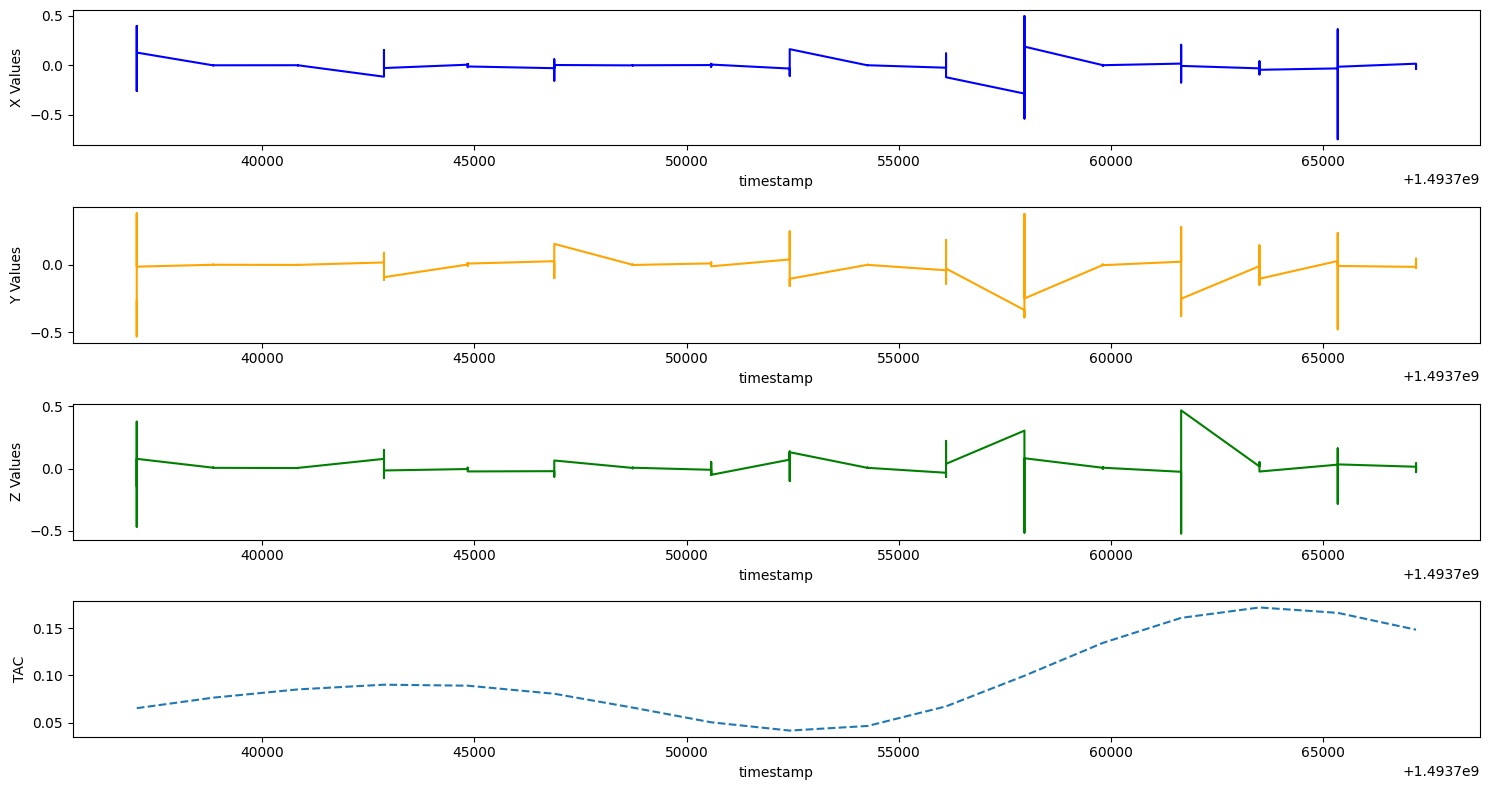

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, figsize=(15, 8))

# Plotting x values
ax[0].plot(result['timestamp'], result['x'], label='x', color='blue')
ax[0].set_xlabel('timestamp')
ax[0].set_ylabel('X Values')

# Plotting y values
ax[1].plot(result['timestamp'], result['y'], label='y', color='orange')
ax[1].set_xlabel('timestamp')
ax[1].set_ylabel('Y Values')

# Plotting z values
ax[2].plot(result['timestamp'], result['z'], label='z', color='green')
ax[2].set_xlabel('timestamp')
ax[2].set_ylabel('Z Values')

# Plotting timestamp time series
ax[3].plot(result['timestamp'], result['TAC_Reading'], label='TAC', linestyle='--')
ax[3].set_xlabel('timestamp')
ax[3].set_ylabel('TAC')

plt.tight_layout()

# Show the plot
plt.show()


Since the acceration data was taken at a sampling rate of 40Hz therefore the time indices are calculated separately for more accurate time series plots.

In [13]:
time_indices = np.arange(result['x'].size)/40
time_indices

array([ 0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
        0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
        0.4  ,  0.425,  0.45 ,  0.475,  0.5  ,  0.525,  0.55 ,  0.575,
        0.6  ,  0.625,  0.65 ,  0.675,  0.7  ,  0.725,  0.75 ,  0.775,
        0.8  ,  0.825,  0.85 ,  0.875,  0.9  ,  0.925,  0.95 ,  0.975,
        1.   ,  1.025,  1.05 ,  1.075,  1.1  ,  1.125,  1.15 ,  1.175,
        1.2  ,  1.225,  1.25 ,  1.275,  1.3  ,  1.325,  1.35 ,  1.375,
        1.4  ,  1.425,  1.45 ,  1.475,  1.5  ,  1.525,  1.55 ,  1.575,
        1.6  ,  1.625,  1.65 ,  1.675,  1.7  ,  1.725,  1.75 ,  1.775,
        1.8  ,  1.825,  1.85 ,  1.875,  1.9  ,  1.925,  1.95 ,  1.975,
        2.   ,  2.025,  2.05 ,  2.075,  2.1  ,  2.125,  2.15 ,  2.175,
        2.2  ,  2.225,  2.25 ,  2.275,  2.3  ,  2.325,  2.35 ,  2.375,
        2.4  ,  2.425,  2.45 ,  2.475,  2.5  ,  2.525,  2.55 ,  2.575,
        2.6  ,  2.625,  2.65 ,  2.675,  2.7  ,  2.725,  2.75 ,  2.775,
      

The time series are plotted again but this time the Time indices are used instead of the Timestamp values.

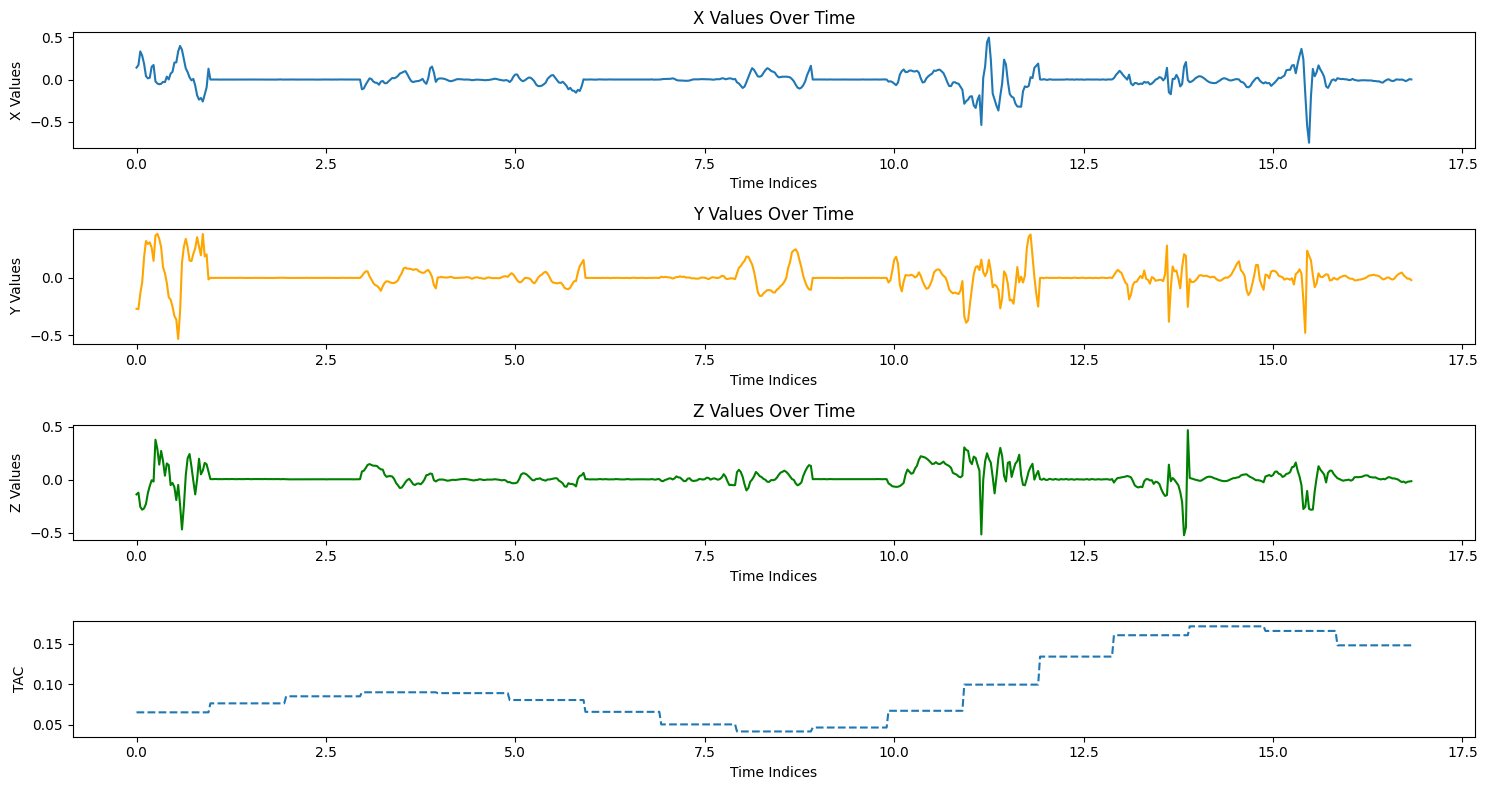

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, figsize=(15, 8))

# Plotting x values
ax[0].plot(time_indices, result['x'], label='x')
ax[0].set_xlabel('Time Indices')
ax[0].set_ylabel('X Values')
ax[0].set_title('X Values Over Time')

# Plotting y values
ax[1].plot(time_indices, result['y'], label='y', color='orange')
ax[1].set_xlabel('Time Indices')
ax[1].set_ylabel('Y Values')
ax[1].set_title('Y Values Over Time')

# Plotting z values
ax[2].plot(time_indices, result['z'], label='z', color='green')
ax[2].set_xlabel('Time Indices')
ax[2].set_ylabel('Z Values')
ax[2].set_title('Z Values Over Time')

# Plotting timestamp time series
ax[3].plot(time_indices, result['TAC_Reading'], label='TAC_Reading', linestyle='--')
ax[3].set_xlabel('Time Indices')
ax[3].set_ylabel('TAC')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The plot data with which the time series are plotted are stored in a dataframe.

In [15]:
plot_data = pd.DataFrame({'Time Indices': time_indices, 'X': result['x'],'TAC': result['TAC_Reading']})

In [16]:
plot_data

,Time Indices,X,TAC
0,0.000,0.1410,0.065357
1,0.025,0.1714,0.065357
2,0.050,0.3328,0.065357
3,0.075,0.2822,0.065357
4,0.100,0.1847,0.065357
...,...,...,...
669,16.725,-0.0073,0.148265
670,16.750,-0.0191,0.148265
671,16.775,-0.0090,0.148265
672,16.800,0.0048,0.148265


In [17]:
pip install ordpy

To calculate the Permutation entropy and complexity the dataframe is divided into groups wherever the TAC values are equal. For the above data we can see that there are 17 different TAC values. So, 17 X-groups are formed for evaluating PE and Complexity.

<Axes: ylabel='Complexity'>

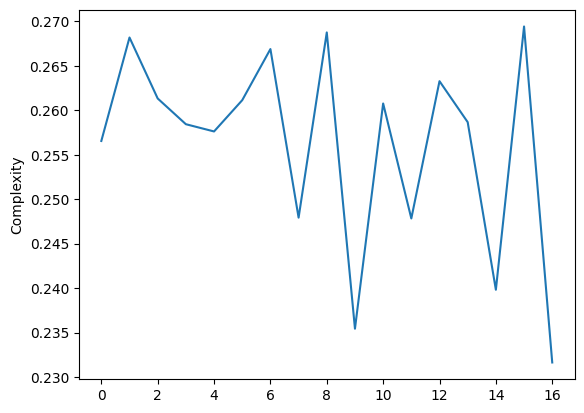

In [18]:
import numpy as np
import pandas as pd
import ordpy
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by TAC Values
plot_data.sort_values(by='TAC', inplace=True)

# Group x values by TAC Values
x_groups = plot_data.groupby('TAC')['X'].apply(list)

# Calculate Permutation Entropy and Complexity for each group
results = []
for tac_value, x_group in x_groups.items():
    pe = ordpy.permutation_entropy(x_group, 3)
    comp = pe / np.log(len(x_group))
    results.append({'TAC Value': tac_value, 'Permutation Entropy': pe, 'Complexity': comp})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

sns.lineplot(results_df['Complexity'])


The TAC value of less than 0.08 are classified as sober cases and the TAC values that are more tahn 0.08 are taken as Non sober.

In [34]:
results_df['Sober/Intoxicated'] = results_df['TAC Value'].apply(lambda x: 0 if x < 0.08 else 1)
results_df

,TAC Value,Permutation Entropy,Complexity,Sober/Intoxicated
0,0.041689,0.946404,0.256556,0
1,0.046559,0.989350,0.268198,0
2,0.050424,0.964042,0.261337,0
3,0.065357,0.946818,0.258442,0
4,0.065953,0.950350,0.257626,0
5,0.067269,0.963337,0.261146,0
6,0.076462,0.984552,0.266897,0
7,0.080588,0.914577,0.247928,1
8,0.085197,0.991455,0.268769,1
9,0.089122,0.856394,0.235429,1


<Axes: xlabel='Permutation Entropy', ylabel='Complexity'>

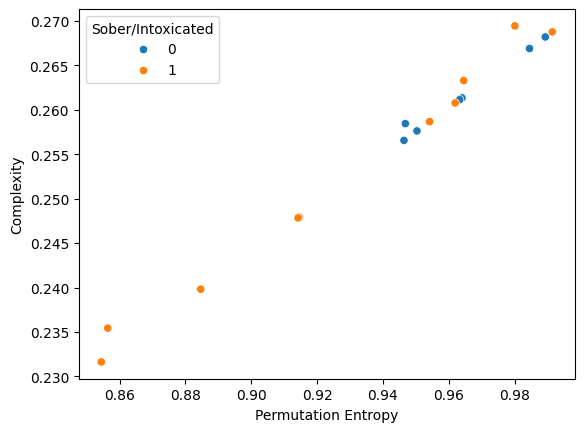

In [35]:
import seaborn as sns
sns.scatterplot(x='Permutation Entropy', y='Complexity', hue=results_df['Sober/Intoxicated'], data=results_df)

In [20]:
plot_data['Sober/Intoxicated'] = plot_data['TAC'].apply(lambda x: 0 if x < 0.08 else 1)

In [21]:
plot_data

,Time Indices,X,TAC,Sober/Intoxicated
336,8.400,0.0929,0.041689,0
339,8.475,0.0262,0.041689,0
340,8.500,0.0287,0.041689,0
341,8.525,0.0338,0.041689,0
342,8.550,0.0331,0.041689,0
...,...,...,...,...
580,14.500,0.0024,0.171758,1
579,14.475,-0.0036,0.171758,1
578,14.450,-0.0106,0.171758,1
576,14.400,0.0014,0.171758,1


A scatter plot is drawn between the time indices and the TAC values. The blue color indicates the time indices where the person was sober and the red indicates a person to be intoxicated.

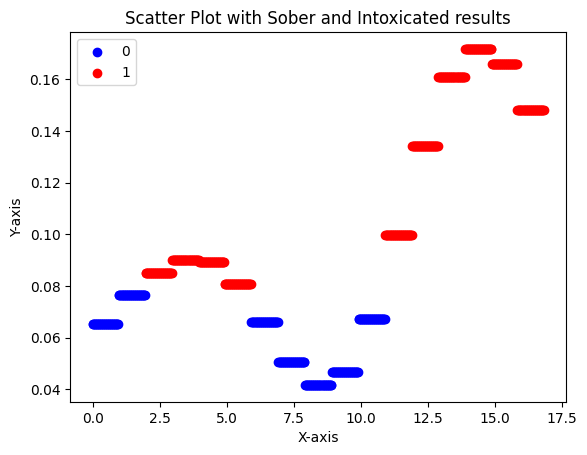

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

x = plot_data['Time Indices']
y = plot_data['TAC']
z = plot_data['Sober/Intoxicated']

# Separate points based on their labels (0 or 1)
x_0 = x[z == 0]
y_0 = y[z == 0]

x_1 = x[z == 1]
y_1 = y[z == 1]

# Create scatter plot
plt.scatter(x_0, y_0, color='blue', label='0')
plt.scatter(x_1, y_1, color='red', label='1')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Sober and Intoxicated results')
plt.legend()

# Show plot
plt.show()


In [23]:
df['timestamp'] = df['time'] // 1000

In [24]:
df

,time,pid,x,y,z,timestamp
0,0,JB3156,0.000000,0.000000,0.000000,0
1,0,CC6740,0.000000,0.000000,0.000000,0
2,1493733882409,SA0297,0.075800,0.027300,-0.010200,1493733882
3,1493733882455,SA0297,-0.035900,0.079400,0.003700,1493733882
4,1493733882500,SA0297,-0.242700,-0.086100,-0.016300,1493733882
...,...,...,...,...,...,...
14057562,1493829248196,CC6740,-0.133956,0.124726,-0.010736,1493829248
14057563,1493829248220,CC6740,-0.100764,0.180872,0.046449,1493829248
14057564,1493829248245,CC6740,-0.131853,0.195934,0.181088,1493829248
14057565,1493829248270,CC6740,-0.149704,0.194482,0.202393,1493829248


Initially The TAC values for a single PID was considered but now the Clean TAC data for all the PID's are taken.

In [25]:
df_tac = pd.read_csv('CLEAN_TAC_final.csv')

In [26]:
df_tac

,timestamp,TAC_Reading,pid
0,1493718714,-0.000482,BK7610
1,1493720697,0.001573,BK7610
2,1493721027,0.002144,BK7610
3,1493721357,0.000877,BK7610
4,1493721686,-0.001145,BK7610
...,...,...,...
710,1493797974,0.029049,SF3079
711,1493799820,0.016286,SF3079
712,1493801652,0.004243,SF3079
713,1493803481,-0.001995,SF3079


A dataframe is merged to include all the accelerator and the TAC data of a PID. This is achieved by merging the Clean TAC data on PID and timestamp values.

In [27]:
merged_df = pd.merge(df, df_tac, left_on=['timestamp', 'pid'], right_on=['timestamp', 'pid'], how='inner')

In [28]:
merged_df

,time,pid,x,y,z,timestamp,TAC_Reading
0,1493734448017,SA0297,0.131200,0.043200,0.003400,1493734448,0.032672
1,1493734448062,SA0297,0.273400,0.119700,0.096800,1493734448,0.032672
2,1493734448107,SA0297,0.151400,0.188600,0.037500,1493734448,0.032672
3,1493734448156,SA0297,-0.091400,0.049600,0.053400,1493734448,0.032672
4,1493734448197,SA0297,-0.793500,-0.518400,0.396700,1493734448,0.032672
...,...,...,...,...,...,...,...
6142,1493809750876,CC6740,0.012896,-0.013732,0.604185,1493809750,0.005040
6143,1493809750902,CC6740,-0.006422,0.023981,0.565886,1493809750,0.005040
6144,1493809750924,CC6740,0.012401,0.004974,0.565885,1493809750,0.005040
6145,1493809750953,CC6740,0.012559,0.005315,0.470111,1493809750,0.005040


A timeseries for timestamp and TAC values for all the PID's is drawn. These timeseries when observed individually gives a clear picture of the TAC readings over the time.

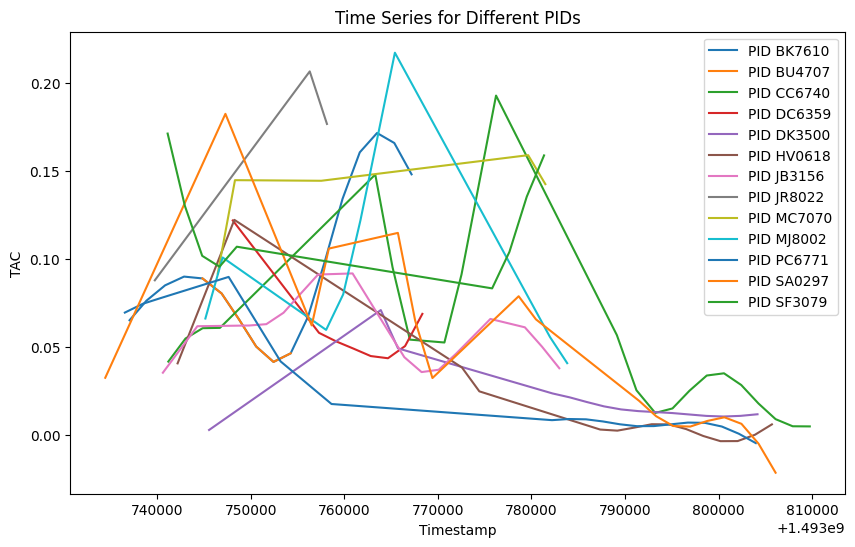

In [29]:
#Group by PID
grouped_df = merged_df.groupby('pid')

# Plot each time series
plt.figure(figsize=(10, 6))
for pid, group_data in grouped_df:
    plt.plot(group_data['timestamp'], group_data['TAC_Reading'], label=f'PID {pid}')

plt.xlabel('Timestamp')
plt.ylabel('TAC')
plt.title('Time Series for Different PIDs')
plt.legend()
plt.show()



Sober and Intoxicated column is added for the merged dataset.

In [30]:
merged_df['Sober/Intoxicated'] = merged_df['TAC_Reading'].apply(lambda x: 0 if x < 0.08 else 1)

In [31]:
merged_df

,time,pid,x,y,z,timestamp,TAC_Reading,Sober/Intoxicated
0,1493734448017,SA0297,0.131200,0.043200,0.003400,1493734448,0.032672,0
1,1493734448062,SA0297,0.273400,0.119700,0.096800,1493734448,0.032672,0
2,1493734448107,SA0297,0.151400,0.188600,0.037500,1493734448,0.032672,0
3,1493734448156,SA0297,-0.091400,0.049600,0.053400,1493734448,0.032672,0
4,1493734448197,SA0297,-0.793500,-0.518400,0.396700,1493734448,0.032672,0
...,...,...,...,...,...,...,...,...
6142,1493809750876,CC6740,0.012896,-0.013732,0.604185,1493809750,0.005040,0
6143,1493809750902,CC6740,-0.006422,0.023981,0.565886,1493809750,0.005040,0
6144,1493809750924,CC6740,0.012401,0.004974,0.565885,1493809750,0.005040,0
6145,1493809750953,CC6740,0.012559,0.005315,0.470111,1493809750,0.005040,0


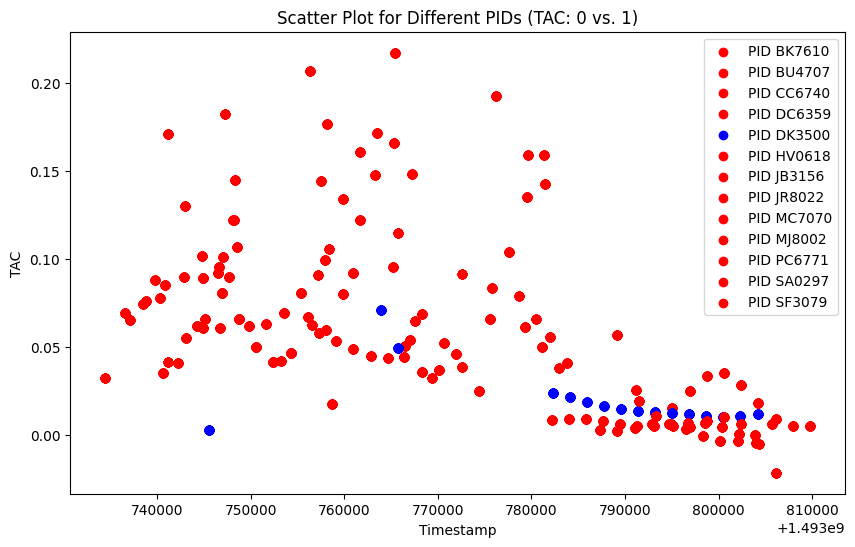

In [32]:
#group by PID
grouped_df = merged_df.groupby('pid')

plt.figure(figsize=(10, 6))
for pid, group_data in grouped_df:
    color = 'red' if 1 in group_data['Sober/Intoxicated'].values else 'blue'
    plt.scatter(group_data['timestamp'], group_data['TAC_Reading'], label=f'PID {pid}', color=color)

plt.xlabel('Timestamp')
plt.ylabel('TAC')
plt.title('Scatter Plot for Different PIDs (TAC: 0 vs. 1)')
plt.legend()
plt.show()


The above scatter plot clearly indicates that the PID DK3500 has been Sober for the whole time period whereas the other PID's indicate that they have been Intoxicated atleast once over the period of time.

The GitHub Link for the project is
https://github.com/Kavya-158/Data_Analytics/blob/main/Permutation%20Entropy%20and%20Complexity.ipynb